In [241]:
import numpy as np
import pandas as pd

In [242]:
data = [1.62434536,  1.98719617,  1.61176108,  0.23404356,  0.20835024, -2.1179662,
 -1.7772783, -2.24935382, -2.1424689,  -2.23773417, -0.74708664, -1.82332947,
 -2.7616089,  -3.63569774, -2.91591724, -3.4385123,  -3.80786085, -4.76978791,
 -5.15241597, -4.60838607, -5.17649067, -4.18829428, -2.48672609, -0.79575907,
  1.21914613,  1.77619176,  1.93876306,  1.02948874, 0.13848555,  0.09305955,
 -0.63139623, -1.4665456,  -2.62955207, -4.11389978, -5.57057245, -6.29268466,
 -7.62043943, -7.93096921, -6.15266733, -4.02640327]

series = pd.Series(data)
series.index = [f"y_{i}" for i in range(1, len(series)+1)]
print("len series", len(series))
series.head()

len series 40


y_1    1.624345
y_2    1.987196
y_3    1.611761
y_4    0.234044
y_5    0.208350
dtype: float64

In [243]:
p = 2

for p in range(1, 3):
    df = pd.DataFrame([series.shift(-1), series])
df = df.dropna(axis=1).T.iloc[:-1, :]
df.columns = ["y1", "y2"]
df.index = [f"yhat_{i}" for i in range(3, df.shape[0] + 3)]

Phi = df
Phi.shape

(38, 2)

In [244]:
Phi.head()

,y1,y2
yhat_3,1.987196,1.624345
yhat_4,1.611761,1.987196
yhat_5,0.234044,1.611761
yhat_6,0.208350,0.234044
yhat_7,-2.117966,0.208350


In [245]:
Phi = Phi.to_numpy()

In [246]:
Y = series[2:]
print("len Y", len(Y))
Y

len Y 38


y_3     1.611761
y_4     0.234044
y_5     0.208350
y_6    -2.117966
y_7    -1.777278
y_8    -2.249354
y_9    -2.142469
y_10   -2.237734
y_11   -0.747087
y_12   -1.823329
y_13   -2.761609
y_14   -3.635698
y_15   -2.915917
y_16   -3.438512
y_17   -3.807861
y_18   -4.769788
y_19   -5.152416
y_20   -4.608386
y_21   -5.176491
y_22   -4.188294
y_23   -2.486726
y_24   -0.795759
y_25    1.219146
y_26    1.776192
y_27    1.938763
y_28    1.029489
y_29    0.138486
y_30    0.093060
y_31   -0.631396
y_32   -1.466546
y_33   -2.629552
y_34   -4.113900
y_35   -5.570572
y_36   -6.292685
y_37   -7.620439
y_38   -7.930969
y_39   -6.152667
y_40   -4.026403
dtype: float64

In [247]:
theta_hat = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ Y
theta_hat

array([ 1.47061689, -0.54909306])

In [248]:
pred = Phi @ theta_hat
pred

array([ 2.03048748,  1.27912743, -0.54081842,  0.17789169, -3.22912053,
       -1.45073493, -2.33204653, -1.91564637, -2.11443485,  0.13004608,
       -2.27119902, -3.06009112, -3.8303382 , -2.29186073, -3.45562433,
       -3.71184122, -4.92366067, -4.95817248, -3.94801451, -5.08220177,
       -3.31700118, -1.35725805,  0.19518732,  2.22984267,  1.94267291,
        1.87588312,  0.44942218, -0.36162594,  0.06081349, -0.97964031,
       -1.81003143, -3.06179366, -4.60610169, -5.93326408, -6.19536564,
       -7.75147742, -7.47908682, -4.6933763 ])

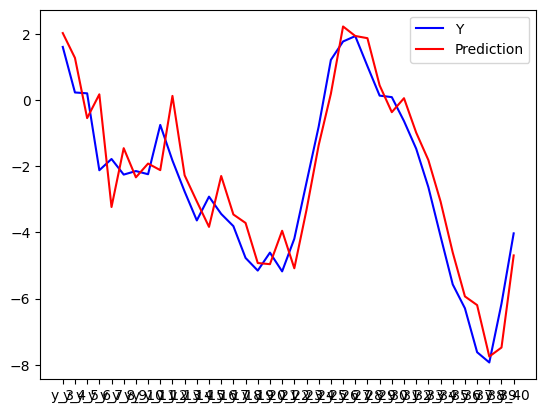

In [249]:
from matplotlib import pyplot as plt

plt.plot(Y, label="Y", color="b")
plt.plot(pred, label = "Prediction", color="r")
plt.legend()

In [250]:
pred

array([ 2.03048748,  1.27912743, -0.54081842,  0.17789169, -3.22912053,
       -1.45073493, -2.33204653, -1.91564637, -2.11443485,  0.13004608,
       -2.27119902, -3.06009112, -3.8303382 , -2.29186073, -3.45562433,
       -3.71184122, -4.92366067, -4.95817248, -3.94801451, -5.08220177,
       -3.31700118, -1.35725805,  0.19518732,  2.22984267,  1.94267291,
        1.87588312,  0.44942218, -0.36162594,  0.06081349, -0.97964031,
       -1.81003143, -3.06179366, -4.60610169, -5.93326408, -6.19536564,
       -7.75147742, -7.47908682, -4.6933763 ])

In [251]:
Y_last_2 = Y[-1:-3:-1].to_numpy()
Y_last_2

array([-4.02640327, -6.15266733])

In [252]:
np.dot(Y_last_2, theta_hat)

-2.542909695012663